## Predicting Toronto's Weather

In this project we'll be predicting the weather in Toronto using historical data from NOAA (National Oceanic and Atmospheric Admnistration):

- Starting with storing and cleaning the data

- Preparing the data for machine learning

- Finally we'll train our machine learning model and evaluate its efficacy with our dataset

In [1]:
import pandas as pd

## Read data in using pandas
weather = pd.read_csv("Pearson_Weather.csv", index_col="DATE")

We'll use the data column as our index for easier access to weather on specific date ranges

In [2]:
## Display the first 5 rows of the data
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,,
2013-06-13,CA006158731,"TORONTO INTERNATIONAL A, ON CA",0.42,0.0,NaN,NaN,73.0,58.0,NaN,NaN
2013-06-14,CA006158731,"TORONTO INTERNATIONAL A, ON CA",0.00,0.0,NaN,NaN,73.0,55.0,NaN,NaN
2013-06-15,CA006158731,"TORONTO INTERNATIONAL A, ON CA",0.00,0.0,NaN,NaN,78.0,50.0,NaN,NaN
2013-06-16,CA006158731,"TORONTO INTERNATIONAL A, ON CA",0.38,0.0,NaN,NaN,79.0,62.0,NaN,NaN
2013-06-17,CA006158731,"TORONTO INTERNATIONAL A, ON CA",0.00,0.0,NaN,NaN,76.0,58.0,NaN,NaN


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3121 entries, 2013-06-13 to 2022-02-12
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3121 non-null   object 
 1   NAME     3121 non-null   object 
 2   PRCP     3103 non-null   float64
 3   SNOW     3104 non-null   float64
 4   SNWD     802 non-null    float64
 5   TAVG     2456 non-null   float64
 6   TMAX     3108 non-null   float64
 7   TMIN     3108 non-null   float64
 8   WDFG     2314 non-null   float64
 9   WSFG     2281 non-null   float64
dtypes: float64(8), object(2)
memory usage: 268.2+ KB


There are some columns that aren't needed for our analysis.

Let's select the most important columns from the dataset:

In [4]:
## Create a copy of needed columns 
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [5]:
## Rename columns
core_weather.columns = ["precip","snow","snow_depth","temp_max","temp_min"]

In [6]:
core_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3121 entries, 2013-06-13 to 2022-02-12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   precip      3103 non-null   float64
 1   snow        3104 non-null   float64
 2   snow_depth  802 non-null    float64
 3   temp_max    3108 non-null   float64
 4   temp_min    3108 non-null   float64
dtypes: float64(5)
memory usage: 146.3+ KB


## Dealing with Null Values

In [7]:
## Show percentage of null values in each column
core_weather.apply(pd.isnull).sum() / weather.shape[0]

precip        0.005767
snow          0.005447
snow_depth    0.743031
temp_max      0.004165
temp_min      0.004165
dtype: float64

We can see that these columns have null values. Let's see what we can do with these columns.

In [8]:
## Show counts of all values in snow column
core_weather["snow"].value_counts(dropna=False)

0.0     2734
0.2       81
0.1       57
0.6       26
0.4       22
NaN       17
0.3       17
0.7       14
0.5       13
0.8       12
0.9       12
1.2       10
1.7        9
1.0        7
1.3        6
2.0        6
1.6        5
1.8        5
2.2        5
2.4        4
2.1        4
1.5        4
2.8        4
3.5        4
2.5        3
1.1        3
1.4        3
3.9        3
5.4        2
3.1        2
2.9        2
2.6        2
3.7        2
4.1        2
4.3        2
7.2        1
1.9        1
3.4        1
7.6        1
4.5        1
3.3        1
6.8        1
10.4       1
6.9        1
2.3        1
2.7        1
4.6        1
5.9        1
6.1        1
4.2        1
3.6        1
11.5       1
Name: snow, dtype: int64

The snow column only has 17 null values so it seems safe to replace these null values with 0's without affecting our data

In [9]:
## Replace null values with 0
core_weather["snow"] = core_weather["snow"].fillna(0.0)

In [10]:
## Display amount of null values
core_weather[core_weather["precip"].isnull()].shape[0]

18

The precipitation column also has a small amount of null values (18) which can be replaced with 0's

In [11]:
##Replace null values with 0
core_weather["precip"] = core_weather["precip"].fillna(0.0)

In [12]:
## Display null values
core_weather["snow_depth"].isnull().sum()

2319

The snow_depth column has 2319 null values which is 74% of the whole dataset. We should delete this column for our analysis.

In [13]:
## Delete snow_depth column
del core_weather["snow_depth"]

In [14]:
## Display amount of null values per column
core_weather.apply(pd.isnull).sum()

precip       0
snow         0
temp_max    13
temp_min    13
dtype: int64

In [15]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,snow,temp_max,temp_min
DATE,,,,
2017-11-08,0.00,0.0,NaN,30.0
2019-05-13,0.30,0.0,NaN,NaN
2021-02-17,0.00,0.0,NaN,NaN
2021-02-18,0.00,0.0,NaN,NaN
2021-07-20,0.00,0.0,NaN,NaN
2021-08-01,0.00,0.0,NaN,NaN
2021-12-09,0.07,0.7,NaN,NaN
2021-12-19,0.00,0.0,NaN,NaN
2021-12-20,0.00,0.0,NaN,NaN


The temp max and min columns still have null values. Looking at our data; typically, day to day temperature doesn't differ drastically. We can use this insight to come up with a solution to replace the null values.

Replacing the null values in temp_max and temp_min with 0 could drastically change our analysis instead, we can use a forward fill to replace null temperatures with the previous days temperature to get a more accurate representation.

In [16]:
## Forward fill the null values for the remaining null values
core_weather = core_weather.fillna(method="ffill")

In [17]:
core_weather.apply(pd.isnull).sum()

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

We've now cleaned our data of missing values.


## Verifying Data Types


Let's now verify the data types of our columns to ensure they are the correct data types.

In [18]:
## Display column date types
core_weather.dtypes

precip      float64
snow        float64
temp_max    float64
temp_min    float64
dtype: object

In [19]:
## display index
core_weather.index

Index(['2013-06-13', '2013-06-14', '2013-06-15', '2013-06-16', '2013-06-17',
       '2013-06-18', '2013-06-19', '2013-06-20', '2013-06-21', '2013-06-22',
       ...
       '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
       '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12'],
      dtype='object', name='DATE', length=3121)

The index seems to be a string data type, but it's made up of date values, we should convert this in to a date time instead

In [20]:
## Convert index to datetime
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
## Display index
core_weather.index

DatetimeIndex(['2013-06-13', '2013-06-14', '2013-06-15', '2013-06-16',
               '2013-06-17', '2013-06-18', '2013-06-19', '2013-06-20',
               '2013-06-21', '2013-06-22',
               ...
               '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-12'],
              dtype='datetime64[ns]', name='DATE', length=3121, freq=None)

Taking a look at the documentation at https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf , there's a note indicating that fields containing 9's (9999) mean that the data is missing or hasn't been recieved.

Let's verify that there isn't any missing data:

In [22]:
## Display counts of columns containing 9999
core_weather.apply(lambda x: (x==9999).sum())

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

In this case none of our columns contained 9999. We can now move on to our analysis

## Analyzing the Weather Data

We can use the dataset we cleaned above to create some plots in order to visualize the data

Text(0, 0.5, 'Temperature (Farenheit)')

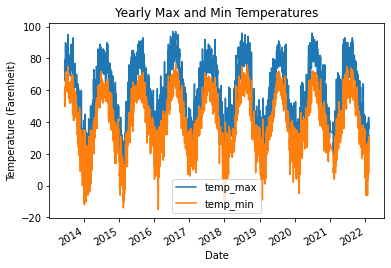

In [23]:
import matplotlib.pyplot as plt

## Plot a heatmap of max and min temperatures for each eyar
core_weather[["temp_max","temp_min"]].plot()
plt.title("Yearly Max and Min Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (Farenheit)")

The minimum and maximum temperatures throughout the years seem to follow a pattern and are very similar from year to year.

In [24]:
## Display counts of weather records for each year
core_weather.index.year.value_counts()

2016    366
2020    366
2014    365
2018    365
2019    365
2015    363
2017    360
2021    332
2013    196
2022     43
Name: DATE, dtype: int64

Text(0, 0.5, 'Amount of Precipitation (Inches)')

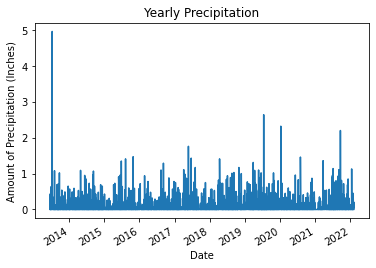

In [25]:
## Display precipitation yearly
core_weather["precip"].plot()
plt.title("Yearly Precipitation")
plt.xlabel("Date")
plt.ylabel("Amount of Precipitation (Inches)")

Precipitation seems to be present throughout the year, but there seems to be an outlier in 2013. There was a large storm in July of 2013 that brought more than 10 inches of precipitation so this data point is valid and not an error.

Text(0, 0.5, 'Amount of Snow (Inches)')

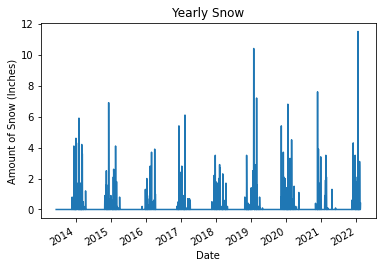

In [26]:
## Display snow yearly
core_weather["snow"].plot()
plt.title("Yearly Snow")
plt.xlabel("Date")
plt.ylabel("Amount of Snow (Inches)")

The yearly snow pattern shows that parts of the year have no snow (summer months) while the winter months tend to have lots of snow with the peak being this year.

## Working with Machine Learning

Now that we've cleaned and explored our data to verify data integrity we can move on to training and testing our dataset to ultimately predict the weather.

What we want to predict: 

- The next days maximum temperature (tomorrow's) using historical data

In [27]:
## Create a target column containing the next days max_temp
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [28]:
## Display core_weather data
core_weather

,precip,snow,temp_max,temp_min,target
DATE,,,,,
2013-06-13,0.42,0.0,73.0,58.0,73.0
2013-06-14,0.00,0.0,73.0,55.0,78.0
2013-06-15,0.00,0.0,78.0,50.0,79.0
2013-06-16,0.38,0.0,79.0,62.0,76.0
2013-06-17,0.00,0.0,76.0,58.0,70.0
...,...,...,...,...,...
2022-02-08,0.00,0.0,31.0,22.0,43.0
2022-02-09,0.00,0.0,43.0,22.0,37.0
2022-02-10,0.00,0.0,37.0,31.0,38.0


The final row in the dataset contains a null value for target this is because we don't have the data for the next day. We should delete this row.

In [29]:
## Keep rows that don't have a null target
core_weather = core_weather[~core_weather["target"].isnull()]

In [30]:
## Display dataframe
core_weather

,precip,snow,temp_max,temp_min,target
DATE,,,,,
2013-06-13,0.42,0.0,73.0,58.0,73.0
2013-06-14,0.00,0.0,73.0,55.0,78.0
2013-06-15,0.00,0.0,78.0,50.0,79.0
2013-06-16,0.38,0.0,79.0,62.0,76.0
2013-06-17,0.00,0.0,76.0,58.0,70.0
...,...,...,...,...,...
2022-02-07,0.00,0.0,32.0,19.0,31.0
2022-02-08,0.00,0.0,31.0,22.0,43.0
2022-02-09,0.00,0.0,43.0,22.0,37.0


We'll start by using Ridge Regression to minimize overfitting

In [31]:
from sklearn.linear_model import Ridge

## Initialize model
reg= Ridge(alpha=.1)

In [32]:
## Initialize list of predictors 
predictors = ["precip","snow","temp_max","temp_min"]

Using our predictors we'll use all days before 2021 to predict weather for all days from the beginning of 2021

In [33]:
## training set all days before 2021
train = core_weather.loc[:"2020-12-31"]

## test set all days after 2020 
test = core_weather.loc["2021-01-01":]

In [34]:
## Fit model to data on train dataset
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [35]:
## Generate predictions on test dataset
predictions = reg.predict(test[predictors])

We'll use mean absolute error to see how well we did with our predictions

In [36]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"],predictions)

5.920994826337824

Above we can see on average we were about 5.9 degrees farenheit off from the actual values

Let's combine our actual values with the predictions to visualize them better. To do this we'll have to convert the predictions from a numpy array to a series and change its' index to the same as the test series

In [37]:
## Combine test and predictions
combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined.columns = ["actual","predictions"]

In [38]:
combined

,actual,predictions
DATE,,
2021-02-03,40.0,35.535236
2021-02-04,35.0,38.412954
2021-02-05,21.0,34.175245
2021-02-06,21.0,26.001322
2021-02-07,20.0,23.145304
...,...,...
2022-02-07,31.0,34.171293
2022-02-08,43.0,34.705518
2022-02-09,37.0,41.961630


<AxesSubplot:xlabel='DATE'>

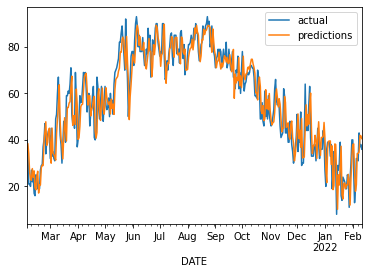

In [39]:
combined.plot()

We can see that our predictions and the actual values seem to line up pretty well and the outliers aren't drastically different

Let's take a look at the coefficients of our regression model to see how the different columns are being used:

In [40]:
reg.coef_

array([-4.8801976 , -0.50489131,  0.60467597,  0.37963373])

It looks like precipitation and snow have a negative impact on temperature while temp_max and temp_min are the biggest and smallest inputs for the model respectively

Now that we've test our model and compared our predictions, let's create a function to do what we did above:

In [41]:
## Create Predictions given predictors, dataframe, and linear regression model
def create_predictions(predictors, core_weather, reg):
    ## Initialize our train and test sets
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    
    ## Fit regression model
    reg.fit(train[predictors],train["target"])
    
    ## Get Predictions
    predictions = reg.predict(test[predictors])
    
    ## Get error metric of predictions compared to actual values                          
    error = mean_absolute_error(test["target"],predictions)
    
    ## Combine test and predictions
    combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns = ["actual","predictions"]   
    
    ## return error metric and combined series
    return error, combined

In [42]:
## Call create_predictions function
create_predictions(predictors,core_weather,reg)

(5.920994826337824,
             actual  predictions
 DATE                           
 2021-02-03    40.0    35.535236
 2021-02-04    35.0    38.412954
 2021-02-05    21.0    34.175245
 2021-02-06    21.0    26.001322
 2021-02-07    20.0    23.145304
 ...            ...          ...
 2022-02-07    31.0    34.171293
 2022-02-08    43.0    34.705518
 2022-02-09    37.0    41.961630
 2022-02-10    38.0    41.750277
 2022-02-11    36.0    40.569157
 
 [374 rows x 2 columns])

## Identifying more Predictors

Let's try to better our model by discovering more predictors

One thing we can take a look at as the rolling mean for our max temperature column:

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
## Create a column for the rolling mean every 30 days 
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [45]:
core_weather

,precip,snow,temp_max,temp_min,target,month_max
DATE,,,,,,
2013-06-13,0.42,0.0,73.0,58.0,73.0,NaN
2013-06-14,0.00,0.0,73.0,55.0,78.0,NaN
2013-06-15,0.00,0.0,78.0,50.0,79.0,NaN
2013-06-16,0.38,0.0,79.0,62.0,76.0,NaN
2013-06-17,0.00,0.0,76.0,58.0,70.0,NaN
...,...,...,...,...,...,...
2022-02-07,0.00,0.0,32.0,19.0,31.0,25.533333
2022-02-08,0.00,0.0,31.0,22.0,43.0,25.300000
2022-02-09,0.00,0.0,43.0,22.0,37.0,26.100000


The values in the beginning of the month_max column are null values because these days don't have 30 days before them to calculate the mean for. We need to remove these null values in order to pass the dataframe to our algorithm

Let's try to find some interesting ratios:

In [46]:
## ratio for the difference between temperatures on each day compared with monthly mean 
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [47]:
## Ratio between max and min temperatures
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

Now that we created 3 more columns we can add these to the predictors list to better our algorithm

In [48]:
## Add columns to predictors
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

In [49]:
## Keep rows where month_max isn't null
core_weather = core_weather.iloc[30:,:].copy()

In [50]:
import numpy as np

## Check for infinity values
core_weather.isin([np.inf, -np.inf]).value_counts()

precip  snow   temp_max  temp_min  target  month_max  month_day_max  max_min
False   False  False     False     False   False      False          False      3079
                                                                     True         11
dtype: int64

There's 11 infinity values in the max_min column let's look at these columns as we need to deal with them before passing the dataset to our prediction function.

Let's replace the infinite values with null values

In [51]:
## Replace infinites with nulls
core_weather = core_weather.replace([np.inf, -np.inf],np.nan)

In [52]:
core_weather.isin([np.inf, -np.inf]).value_counts()

precip  snow   temp_max  temp_min  target  month_max  month_day_max  max_min
False   False  False     False     False   False      False          False      3090
dtype: int64

In [53]:
core_weather.apply(pd.isnull).sum()

precip            0
snow              0
temp_max          0
temp_min          0
target            0
month_max         0
month_day_max     0
max_min          11
dtype: int64

In [54]:
## Keep only rows without null values
core_weather = core_weather[~core_weather["max_min"].isnull()]

In [55]:
core_weather.apply(pd.isnull).sum()

precip           0
snow             0
temp_max         0
temp_min         0
target           0
month_max        0
month_day_max    0
max_min          0
dtype: int64

In [56]:
## Create predictions for new predictors
error, combined = create_predictions(predictors,core_weather,reg)

In [57]:
## Display error metric
error

5.880628965677671

Our previous predictions were 5.92 degrees off. Using additional predictors reduced the error metric by 0.04 to 5.88 degrees

<AxesSubplot:xlabel='DATE'>

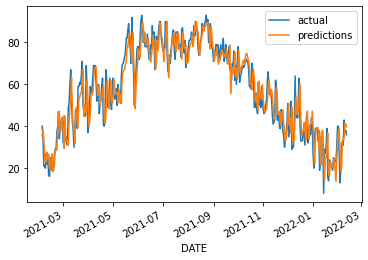

In [58]:
combined.plot()

Let's try to lower our error metric even more by adding more predictors to better our prediction. 

We can add the monthly average temperature:

In [59]:
## Group maximum temperature by month and get expanding mean
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

Since we're working with time series data we don't want to take data that we don't know yet to calculate the mean for each given month. We used expanding as it only takes previous rows and calculates the mean. 

In [60]:
core_weather

,precip,snow,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,,
2013-07-15,0.00,0.0,88.0,72.0,91.0,79.200000,0.900000,1.222222,88.000000
2013-07-16,0.00,0.0,91.0,72.0,95.0,79.800000,0.876923,1.263889,89.500000
2013-07-17,0.00,0.0,95.0,75.0,93.0,80.366667,0.845965,1.266667,91.333333
2013-07-18,0.00,0.0,93.0,75.0,95.0,80.833333,0.869176,1.240000,91.750000
2013-07-19,0.34,0.0,95.0,70.0,83.0,81.466667,0.857544,1.357143,92.400000
...,...,...,...,...,...,...,...,...,...
2022-02-07,0.00,0.0,32.0,19.0,31.0,25.533333,0.797917,1.684211,30.735683
2022-02-08,0.00,0.0,31.0,22.0,43.0,25.300000,0.816129,1.409091,30.736842
2022-02-09,0.00,0.0,43.0,22.0,37.0,26.100000,0.606977,1.954545,30.790393


Let's do the same to find the average for every day of the year:

In [61]:
## Group maximum temperature by day and get expanding mean
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day).apply(lambda x: x.expanding(1).mean())

Again, we use expanding to calculate for every previous day of the year

In [62]:
core_weather

,precip,snow,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,
2013-07-15,0.00,0.0,88.0,72.0,91.0,79.200000,0.900000,1.222222,88.000000,88.000000
2013-07-16,0.00,0.0,91.0,72.0,95.0,79.800000,0.876923,1.263889,89.500000,91.000000
2013-07-17,0.00,0.0,95.0,75.0,93.0,80.366667,0.845965,1.266667,91.333333,95.000000
2013-07-18,0.00,0.0,93.0,75.0,95.0,80.833333,0.869176,1.240000,91.750000,93.000000
2013-07-19,0.34,0.0,95.0,70.0,83.0,81.466667,0.857544,1.357143,92.400000,95.000000
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,0.00,0.0,32.0,19.0,31.0,25.533333,0.797917,1.684211,30.735683,55.794118
2022-02-08,0.00,0.0,31.0,22.0,43.0,25.300000,0.816129,1.409091,30.736842,55.720000
2022-02-09,0.00,0.0,43.0,22.0,37.0,26.100000,0.606977,1.954545,30.790393,56.764706


Let's update our predictors with the new columns and call the function again

In [63]:
## Update predictors
predictors = predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min", "monthly_avg","day_of_year_avg"]

In [64]:
## Create new predictions
error, combined = create_predictions(predictors, core_weather,reg)

In [65]:
## Display error metric
error

5.544195661238977

We've now reduced the error metric from 5.88 to 5.54 degrees farenheit

In [66]:
## Display coefficients for regression model
reg.coef_

array([-5.50670041,  0.48890937,  0.26047823,  0.34920463, -0.14766929,
        0.27272598, -0.12350185])

In [67]:
## Display correlation with target
core_weather.corr()["target"]

precip             0.000299
snow              -0.270205
temp_max           0.929384
temp_min           0.913662
target             1.000000
month_max          0.874069
month_day_max     -0.210922
max_min           -0.140823
monthly_avg        0.892070
day_of_year_avg    0.189516
Name: target, dtype: float64

Many of these columns (temp_max, temp_min,month_max,monthly_avg) correlate pretty closely to the target column

In [68]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [69]:
combined.sort_values("diff",ascending=False).head()

,actual,predictions,diff
DATE,,,
2021-03-29,69.0,44.637586,24.362414
2021-05-24,92.0,70.149448,21.850552
2021-12-10,64.0,42.483280,21.516720
2021-04-22,67.0,45.677255,21.322745
2022-01-14,8.0,28.229300,20.229300


# Summary



For this analysis we set out to predict the weather for Toronto using weather data from the Pearson International Airport using machine learning. We went through the process of:

- Cleaning the data

- Preparing the data for our machine learning algorithm

- Created test and train sets to predict the weather for any day in 2021


Ultimately, weather is a complex phenomenon to predict and there isn't necessarily one algorithm to come to a conclusion. After our analysis, we managed to get our linear regression algorithm to predict a mean squared error metric of 5.54 - meaning predictions for 2021 onward were off by 5.54 degrees farenheit. We can take our next steps by exploring other algorithms and adding more predictors in the future.